### 3

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

# add the parent directory to the Python path to import fnc.py
# including levenberg, newtonsys
sys.path.append("..") 
from fnc import *

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# data
deaths = np.array([
    5, 10, 17, 22, 30, 50, 51, 90, 120, 180, 292, 395, 445, 775, 780,
    700, 698, 880, 925, 800, 578, 400, 350, 202, 105, 65, 55, 40, 30, 20
], dtype=float)

t_full = np.arange(1, len(deaths)+1)

# model
def sech(x):
    return 1/np.cosh(x)

def model(t, x):
    A, B, C = x
    return A * sech(B*(t - C))**2

def misfit(x):
    return model(t_full, x) - deaths


In [3]:
# find the best least-squares fit using leverberg's method
initial_guess = [deaths.max(), 0.1, t_full[np.argmax(deaths)]]

x_seq = levenberg(misfit, initial_guess)
x_sol = x_seq[-1]

print(f"the solution is: {x_sol}")

the solution is: [8.82645472e+02 1.88446119e-01 1.73389269e+01]


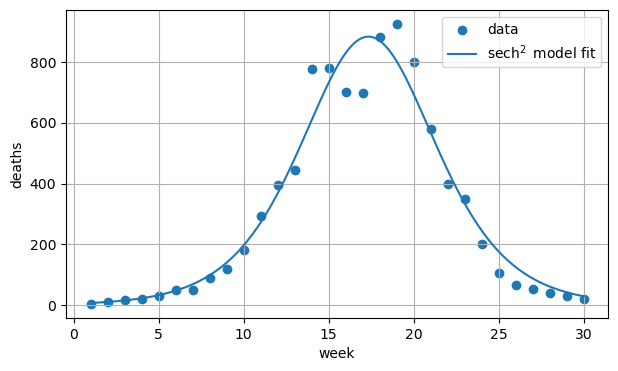

In [4]:
t_fine = np.linspace(t_full[0], t_full[-1], 400)
plt.figure(figsize=(7,4))
plt.scatter(t_full, deaths, label="data")
plt.plot(t_fine, model(t_fine, x_sol), label=r"$\operatorname{sech}^2$ model fit")
plt.xlabel("week")
plt.ylabel("deaths")
plt.legend()
plt.grid()
plt.show()

In [5]:
# fitting only using first 15 data values
t_15 = t_full[:15]
d_15 = deaths[:15]

def misfit_15(x):
    return model(t_15, x) - d_15

# find the best least-squares fit using leverberg's method
initial_guess = [d_15.max(), 0.1, t_15[np.argmax(d_15)]]

x_seq = levenberg(misfit_15, initial_guess)
x_sol_15 = x_seq[-1]

print(f"the solution is: {x_sol}")

the solution is: [8.82645472e+02 1.88446119e-01 1.73389269e+01]


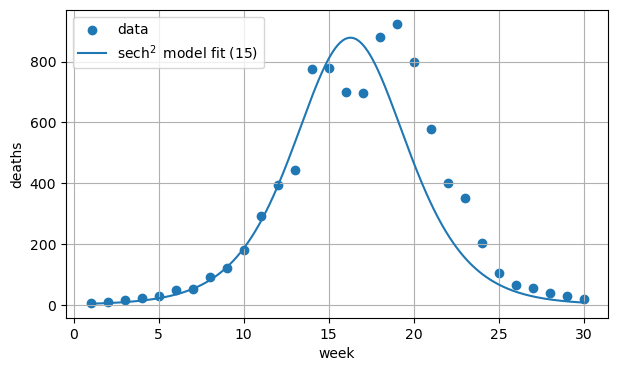

In [6]:
t_fine = np.linspace(t_full[0], t_full[-1], 400)
plt.figure(figsize=(7,4))
plt.scatter(t_full, deaths, label="data")
plt.plot(t_fine, model(t_fine, x_sol_15), label=r"$\operatorname{sech}^2$ model fit (15)")
plt.xlabel("week")
plt.ylabel("deaths")
plt.legend()
plt.grid()
plt.show()

### 4

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# data
m = 30
t = 2*np.pi*np.random.rand(m)
x = -2 + 5*np.cos(t)
y =  1 + 5*np.sin(t)
x += 0.2*np.random.randn(m)
y += 0.2*np.random.randn(m)

# misfit function
def misfit(params):
    a, b, r = params
    return (a - x)**2 + (b - y)**2 - r**2     # m‑维


In [8]:
# set the initial guess
x_guess = x.mean()
y_guess = y.mean()
r_guess = (((x - x_guess) ** 2 + (y - y_guess) ** 2) ** 0.5).mean()
initial_guess = [x_guess, y_guess, r_guess]

params = levenberg(misfit, initial_guess)[-1]
a, b, r = params

print(f"Estimated center : a = {a:.4f}, b = {b:.4f}")
print(f"Estimated radius : r = {r:.4f}")

Estimated center : a = -1.8968, b = 0.9599
Estimated radius : r = 4.9465


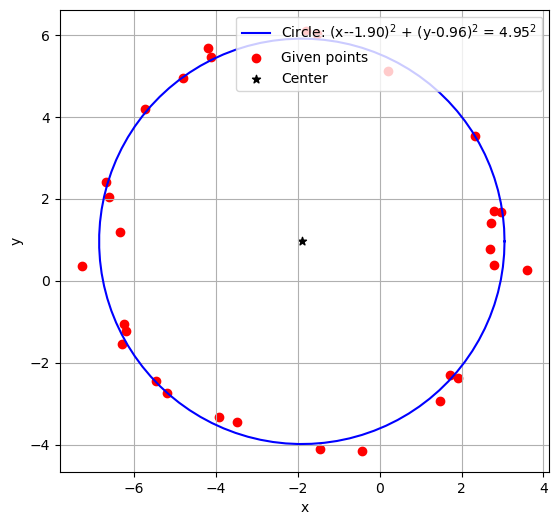

In [9]:
theta = np.linspace(0, 2*np.pi, 100)
x_circle = a + r * np.cos(theta)
y_circle = b + r * np.sin(theta)

plt.figure(figsize=(8, 6))
plt.plot(x_circle, y_circle, color='blue', 
         label=f"Circle: (x-{a:.2f})$^2$ + (y-{b:.2f})$^2$ = {r:.2f}$^2$")
plt.scatter(x, y, color='red', label='Given points')
plt.scatter(a, b, color='black', marker='*', label='Center')
plt.gca().set_aspect('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

### 5

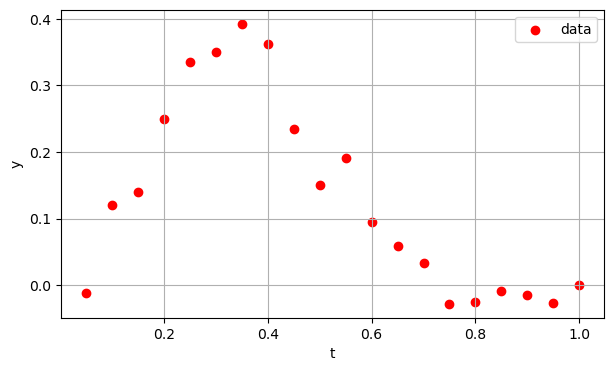

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def model(t, a):
    """lid trajectory y(t; a) with a = [a_1, a_2, a_3]"""
    a_1, a_2, a_3 = a
    return a_1 * t**2 * np.exp(-a_2 * t**a_3)

def generate_data(a, N, noise_amp):
    """generate N noisy measurements of y(t)"""
    t = np.linspace(1, N, N) / N
    y = model(t, a)
    y[:-1] += noise_amp * np.random.randn(N-1)  # add noise to first N-1 points
    return t, y

a_true = [10, 10, 2]
N = 20
noise_amp = 0.03
t, ym = generate_data(a_true, N, noise_amp)

plt.figure(figsize=(7,4))
plt.scatter(t, ym, color='red', label="data")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

In [11]:
def misfit(a):
    return model(t, a) - ym

# set the initial guess
initial_guess = [7, 7, 7]

a_sol = levenberg(misfit, initial_guess)[-1]

print(f"Estimated a_1 = {a_sol[0]:.4f}, a_2 = {a_sol[1]:.4f}, a_3 = {a_sol[2]:.4f}")

Estimated a_1 = 8.3621, a_2 = 11.7343, a_3 = 2.3269


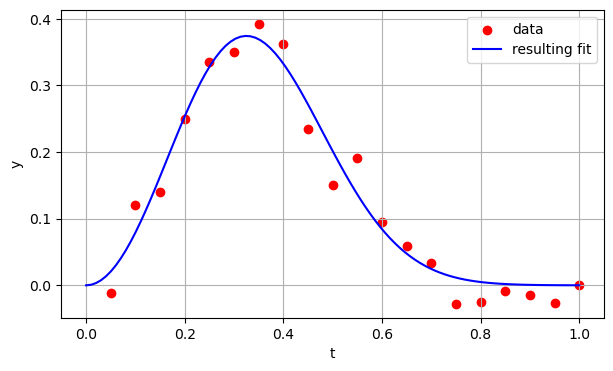

In [12]:
Np = 100
tp = np.linspace(0, 1, Np)
yp = model(tp, a_sol)

plt.figure(figsize=(7,4))
plt.scatter(t, ym, color='red', label="data")
plt.plot(tp, yp, color='blue', label="resulting fit")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

Estimated a_1 = 9.2948, a_2 = 10.2232, a_3 = 2.1112


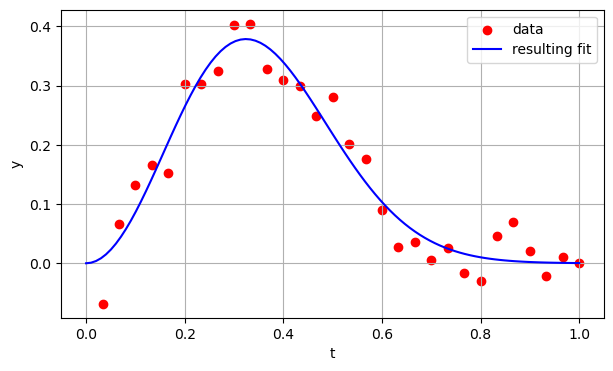

In [13]:
N = 30
noise_amp = 0.05
t, ym = generate_data(a_true, N, noise_amp)

initial_guess = [7, 7, 7]
a_sol = levenberg(misfit, initial_guess, maxiter=100)[-1]
print(f"Estimated a_1 = {a_sol[0]:.4f}, a_2 = {a_sol[1]:.4f}, a_3 = {a_sol[2]:.4f}")

Np = 100
tp = np.linspace(0, 1, Np)
yp = model(tp, a_sol)

plt.figure(figsize=(7,4))
plt.scatter(t, ym, color='red', label="data")
plt.plot(tp, yp, color='blue', label="resulting fit")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

### 6

Solution: a_1 = 23.9735, a_2 = -49.3734, a_3 = 25.6883, a_4 = 4.3831, a_5 = 2.3032, 


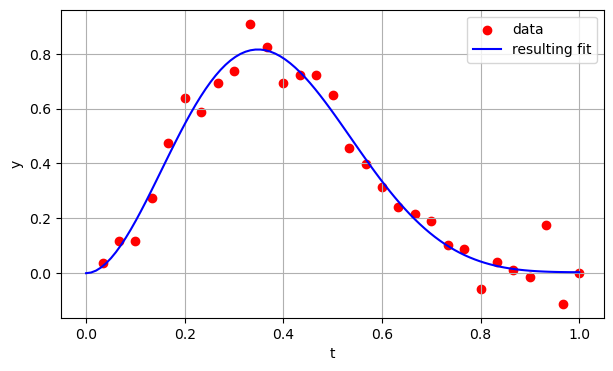

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# reset the model and data
def model(t, a):
    """lid trajectory y(t; a) with a = [a_1, a_2, a_3, a_4, a_5]"""
    a_1, a_2, a_3, a_4, a_5 = a
    return (a_1 + a_2*t + a_3*t**2) * t**2 * np.exp(-a_4 * t**a_5)

def generate_data(a, N, noise_amp):
    """generate N noisy measurements of y(t)"""
    t = np.linspace(1, N, N) / N
    y = model(t, a)
    y[:-1] += noise_amp * np.random.randn(N-1)  # add noise to first N-1 points
    return t, y

# create synthetic eyslid position data
a_true = [20, -10, -8, 7, 2]
N = 30
noise_amp = 0.05
t, ym = generate_data(a_true, N, noise_amp)

# define the misfit function
def misfit(a):
    return model(t, a) - ym

# set the initial guess and optimize using Levenberg
initial_guess = [7, 7, 7, 7, 7]
a_sol = levenberg(misfit, initial_guess, maxiter=100)[-1]
print("Solution: " + "".join([f"a_{i+1} = {a_sol[i]:.4f}, " for i in range(5)]))

Np = 100
tp = np.linspace(0, 1, Np)
yp = model(tp, a_sol)

plt.figure(figsize=(7,4))
plt.scatter(t, ym, color='red', label="data")
plt.plot(tp, yp, color='blue', label="resulting fit")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()